# Dax Analyse
Alle Daten werden über freie EOD-Daten von Yahoo Finance bezogen.



## Tickersymbol
Dax ^GDAXI


## Links
https://nbviewer.jupyter.org/github/gannscalper/daxminer/blob/master/DaxAnalyse.ipynb

## Git Repo
https://github.com/gannscalper/daxminer


In [44]:
from pandas_datareader import data, wb
from datetime import datetime
from scipy import stats

tickersymbol = '^GDAXI'
startdate = datetime(1980, 1, 1)
enddate = datetime.now()



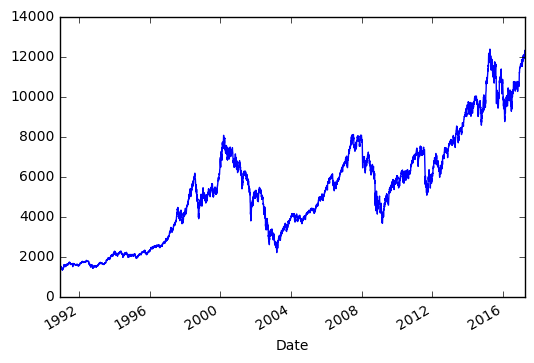

In [45]:
import matplotlib.pyplot as plt

def read_data(ts):
    symbol_data = data.DataReader(ts, 'yahoo', startdate, enddate)
    return symbol_data

ts_data = read_data(tickersymbol)
ts_data['Close'].plot()
plt.show()



## Ausgabe der durchschnittlichen Tagesschwankung von High-Low

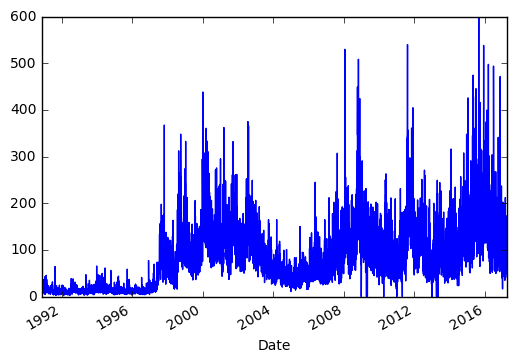

In [33]:
def hilo_vola():
    open1 = ts_data['High']
    close1 = ts_data['Low']
    hilovola = abs(close1 - open1)
    return hilovola

def hilo_mean():
    return hilo_vola().mean()

vola = hilo_vola()
vola.plot()
plt.show()



In [34]:
print('Die durchschnittliche Tagesschwankung beträgt: ')
print(round(hilo_mean(),2))

Die durchschnittliche Tagesschwankung beträgt: 
85.26


## Histogramm der Vola - Häufigkeitsverteilung

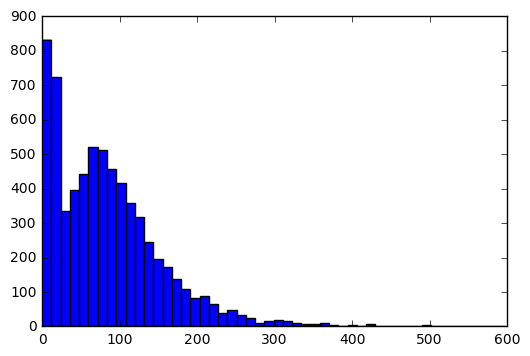

In [35]:
plt.hist(vola ,50)
plt.show()

## Standardabweichung


In [36]:
import numpy as np
print("Standardabweichung: ")
vola.std()

Standardabweichung: 


70.16183241293666

## Varianz

In [37]:
print("Varianz: ")
vola.var()

Varianz: 


4922.68272754101

## Normaverteilung / Gauß-Verteilung

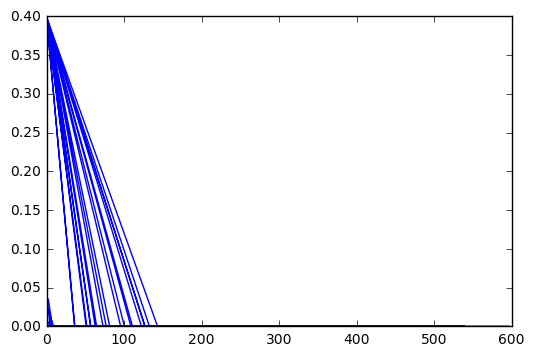

In [38]:
from scipy.stats import norm
import matplotlib.pyplot as pl
plt.plot(vola, norm.pdf(vola))
plt.show()